# Handling audio data in Python part three

## Time domain analysis

Now we are going to work with some urban audio recordings, which are far more complex than the signals we have previously dealt with

First of all get all of our imports and setup calls:

In [17]:
%matplotlib inline
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = 16, 8
pylab.rcParams['font.size'] = 16

Read in the audio data from a mono recording made on a Brooklyn street

In [18]:
fs, samples = wavfile.read('audio/brooklyn_street.wav')

Lets check out some of the recordings details

In [19]:
dur = float(len(samples)) / fs
sample_len = len(samples)

print 'Sample rate: ', fs, 'Hz'
print 'Length in samples: ', sample_len
print 'Length in seconds: ', '%.3f' % dur
print 'Sample data type: ', samples.dtype

Sample rate:  44100 Hz
Length in samples:  2533368
Length in seconds:  57.446
Sample data type:  int16


The sample data is in the form of 16 bit integers so lets convert to floats

In [20]:
samples = samples / 32768.0

Now we want to get a feel for the urban recording so lets plot it in its entirety in the time domain with the time in seconds along the x axis

First we create our time value array for plotting time across the x axis

In [21]:
T = np.linspace(0, dur, num=sample_len)

Now we plot our urban soundscape in the time domain

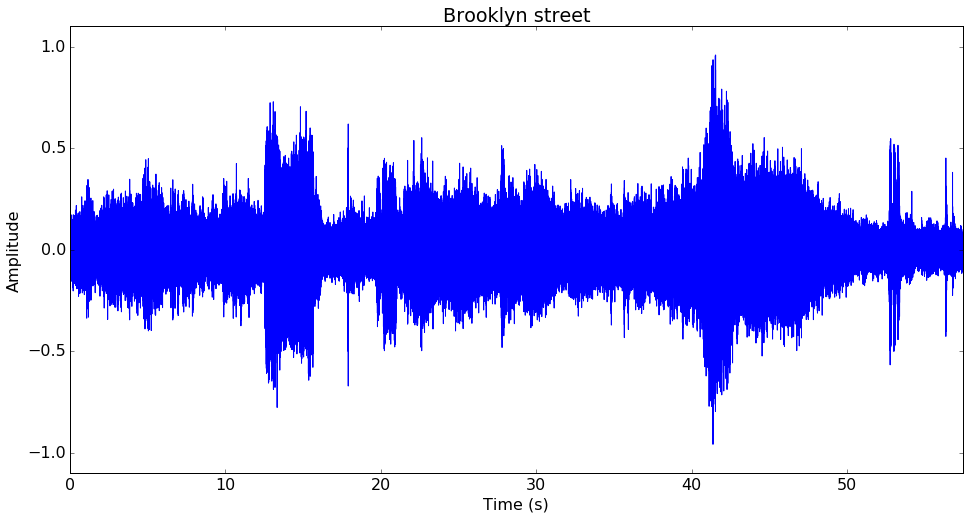

In [22]:
plt.plot(T, samples)
plt.ylim([-1.1, 1.1])
plt.xlim([0, np.max(T)])
plt.title('Brooklyn street')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

This gives us an idea about the **"amplitude envelope"** of our recording. This means we can determine how the volume changes over time

To get a better look at the amplitude envelope we take the absolute of our audio samples, meaning we change the signs of all negative values to positive

In [23]:
ab_samples = np.abs(samples)

Plot the absolute waveform to see how it looks, limiting the y-axis range to the length of data

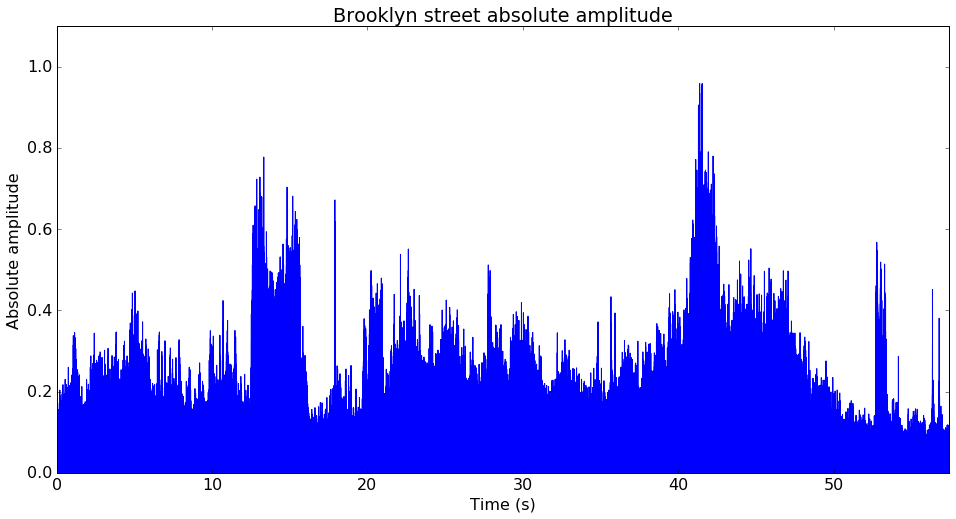

In [24]:
plt.plot(T, ab_samples)
plt.ylim([0, 1.1])
plt.xlim([0, np.max(T)])
plt.title('Brooklyn street absolute amplitude')
plt.xlabel('Time (s)')
plt.ylabel('Absolute amplitude')

The raw absolute amplitude data gives us some clues about the evolution of the soundscape over time

## Visualizing in the time and frequency domain

The visualization of complex waveforms both in the time and frequency domain can help in understanding their underlying characteristics

The **spectrogram** is the visual representation of a time domain signals frequency content as they vary with time. The dimensions of this representation are time on the x-axis, frequency on the y-axis, with the "z-axis" representing amplitude in the form of pixel color

To help us understand how the spectrogram works, we will generate something called a **chirp** or **swept sine** signal. This is a signal that starts at a low frequency and rises in frequency over time

In [25]:
from scipy.signal import chirp

dur = 3

chir_samp_len = fs * dur

chirp_win_size = 1024

T_chirp = np.linspace(0, dur, chir_samp_len)

chirp_samps = chirp(T_chirp, f0=20, t1=dur, f1=20000, method='linear')

Matplotlib has a built in spectrogram plotting function that handles the details for us, so we will use this to plot our chirp

Notice how I've set the window size to a different value to the previous analysis work. Try adjusting this value and see what effect this has on the spectrogram.

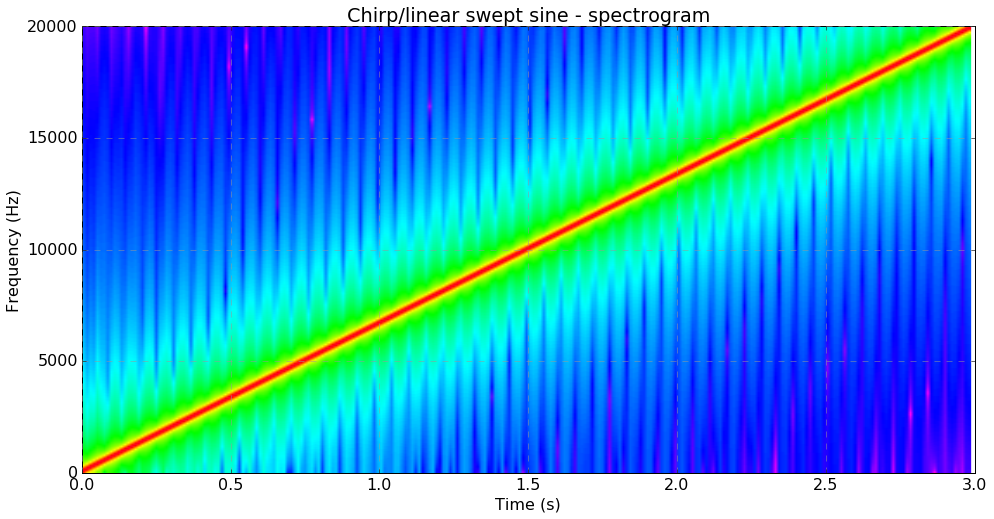

In [26]:
plt.specgram(chirp_samps, NFFT = chirp_win_size, noverlap = chirp_win_size/2, Fs = fs, mode = 'magnitude', scale = 'dB');
plt.ylim([0, 20000])
plt.xlim([0, np.max(T_chirp)])
plt.set_cmap('gist_rainbow_r')
plt.title('Chirp/linear swept sine - spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.grid(b=True, which='both', color='0.6',linestyle='--')

Increasing the window size gives us more frequency resolution, but impaired time resolution. Decreasing the size impairs our frequency resolution, but improves the time resolution

We have the amount of window overlap set at 50%. Vary this to see its effect. If this is very small, adjacent windows will not overlap as much, so you will get less pixel density along the x-axis in our spectrogram. Increasing the overlap will result in more MS windows being caluculated, so a higher pixel density will be achieved

Now lets generate a spectrogram of our urban recording

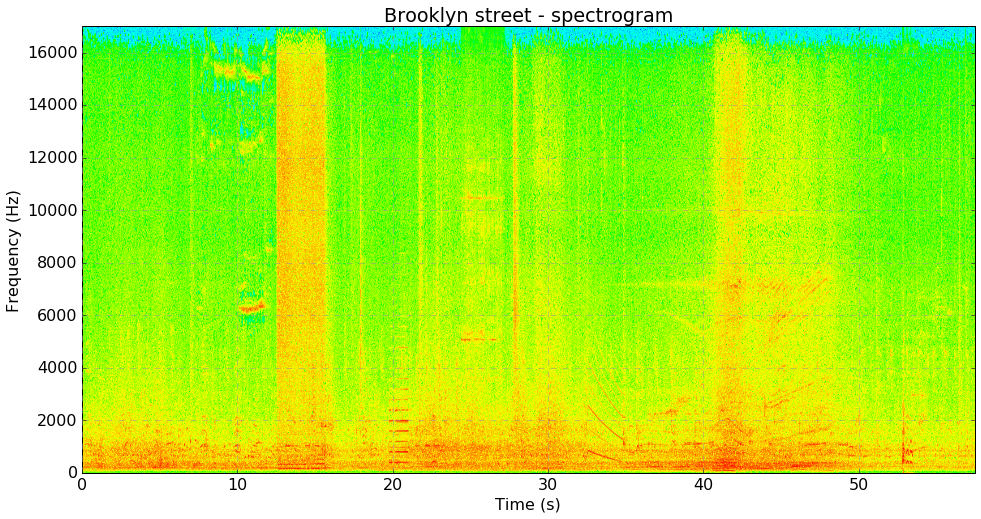

In [27]:
window_size = 2048

plt.specgram(samples, NFFT = window_size, noverlap = window_size/2, Fs = fs, mode = 'magnitude', scale = 'dB');
plt.ylim([0, 17000])
plt.xlim([0, np.max(T)])
plt.set_cmap('gist_rainbow_r')
plt.title('Brooklyn street - spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.grid(b=True, which='both', color='0.6',linestyle='--')